### NN test

In [1]:
import torch
import torch.nn as nn

In [9]:
torch.Tensor( 2,3 ).fill_(0)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [70]:
class NoisyLinear( nn.Module ):
    def __init__( self, input_size, output_size, stddev = 0.1 ):
        super().__init__()
        w = torch.Tensor( input_size, output_size )
        self.w = nn.Parameter(w)
        nn.init.xavier_normal_(w)

        b = torch.Tensor( output_size ).fill_(0)
        self.b = nn.Parameter(b)
        self.stddev_noise = stddev

    def forward( self, x, is_training = False ):
        if is_training:
            noise = torch.normal( 0.0,  self.stddev_noise, x.shape )
            new_x = torch.add( x, noise )
        else:
            new_x = x
        return torch.add(torch.mm( new_x, self.w ), self.b )        

In [171]:
n_linear = NoisyLinear(2,4)

In [72]:
x = torch.zeros(1,4)
x

tensor([[0., 0., 0., 0.]])

In [73]:
torch.normal( 0.0,  0.1, x.shape )

tensor([[-0.0864,  0.1710, -0.1147,  0.2150]])

In [88]:
n_linear(x, is_training = True )
n_linear(x, is_training = False )

tensor([[0., 0.]], grad_fn=<AddBackward0>)

In [181]:
class MyNoisyModel( nn.Module ):
    
    def __init__( self ):
        super().__init__()
        self.l1 = NoisyLinear(2,4,1.5)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear( 4, 4 )
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear( 4, 1 )
        self.a3 = nn.Sigmoid()
    
    def forward( self, x ):
        x = self.l1(x, is_training = True)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x
    
    def predict( self, x ):
        x = torch.tensor( x, dtype=torch.float32 )
        pred = self.forward(x).squeeze()
        return ( pred >= 0.5 ).float()

In [182]:
model = MyNoisyModel()
loss_f = nn.BCELoss()
optimizer = torch.optim.SGD( model.parameters(), lr=0.01 )
n_epochs = 100

In [183]:
model(x_train)

tensor([[0.5012],
        [0.4646],
        [0.4682],
        [0.4674],
        [0.4682],
        [0.4766],
        [0.5002],
        [0.4763],
        [0.4642],
        [0.4645],
        [0.4970],
        [0.4682],
        [0.5084],
        [0.4904],
        [0.4945],
        [0.4682],
        [0.5281],
        [0.5086],
        [0.4682],
        [0.4611],
        [0.4970],
        [0.4682],
        [0.4935],
        [0.4829],
        [0.4680],
        [0.4825],
        [0.4577],
        [0.4555],
        [0.4682],
        [0.5090],
        [0.4667],
        [0.5151],
        [0.4925],
        [0.4868],
        [0.4882],
        [0.4777],
        [0.4998],
        [0.4529],
        [0.4868],
        [0.4879],
        [0.4696],
        [0.5350],
        [0.4799],
        [0.4715],
        [0.4682],
        [0.4938],
        [0.4883],
        [0.4783],
        [0.4827],
        [0.4682],
        [0.5147],
        [0.4881],
        [0.4772],
        [0.4806],
        [0.5175],
        [0

In [145]:
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0
n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)
train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [155]:
x_batch

tensor([[ 0.8172, -0.4128],
        [-0.5911,  0.7562]])

Epoch 1/100 - Train Loss: 0.6937, Train Acc: 0.5400
Epoch 1/100 - Val Loss: 0.6798, Val Acc: 0.6900
Epoch 2/100 - Train Loss: 0.6946, Train Acc: 0.5100
Epoch 2/100 - Val Loss: 0.6803, Val Acc: 0.6400
Epoch 3/100 - Train Loss: 0.6990, Train Acc: 0.5000
Epoch 3/100 - Val Loss: 0.6814, Val Acc: 0.5500
Epoch 4/100 - Train Loss: 0.6974, Train Acc: 0.4500
Epoch 4/100 - Val Loss: 0.6825, Val Acc: 0.5500
Epoch 5/100 - Train Loss: 0.6937, Train Acc: 0.5400
Epoch 5/100 - Val Loss: 0.6832, Val Acc: 0.5400
Epoch 6/100 - Train Loss: 0.7023, Train Acc: 0.4900
Epoch 6/100 - Val Loss: 0.6841, Val Acc: 0.5300
Epoch 7/100 - Train Loss: 0.6901, Train Acc: 0.5100
Epoch 7/100 - Val Loss: 0.6843, Val Acc: 0.5300
Epoch 8/100 - Train Loss: 0.6958, Train Acc: 0.5400
Epoch 8/100 - Val Loss: 0.6856, Val Acc: 0.5300
Epoch 9/100 - Train Loss: 0.6822, Train Acc: 0.5400
Epoch 9/100 - Val Loss: 0.6848, Val Acc: 0.5300
Epoch 10/100 - Train Loss: 0.6928, Train Acc: 0.5400
Epoch 10/100 - Val Loss: 0.6854, Val Acc: 0.530

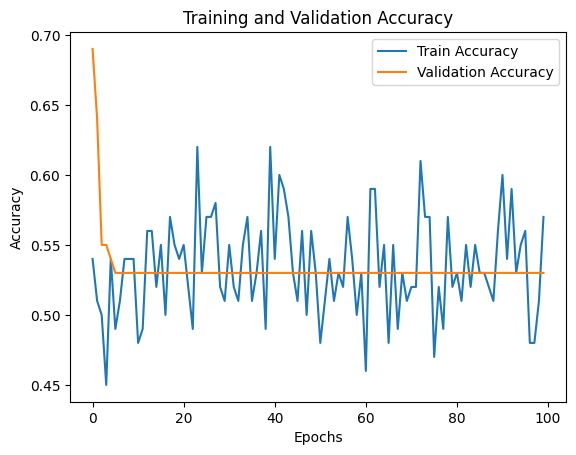

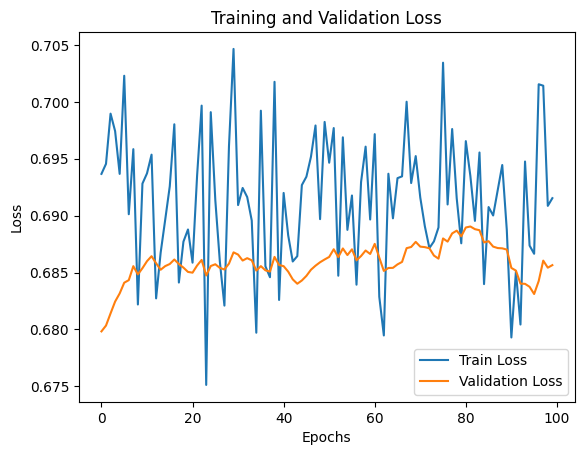

In [201]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# Define the NoisyLinear layer
class NoisyLinear(nn.Module):
    def __init__(self, in_features, out_features, noise_level):
        super(NoisyLinear, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        self.noise_level = noise_level

    def forward(self, x, is_training=True):
        if is_training:
            noise = torch.randn_like(x) * self.noise_level
            return self.linear(x + noise)
        else:
            return self.linear(x)

# Define your custom model
class MyNoisyModel(nn.Module):
    def __init__(self):
        super(MyNoisyModel, self).__init__()
        self.l1 = NoisyLinear(2, 4, 1.5)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()

    def forward(self, x, is_training=True):
        x = self.l1(x, is_training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x

    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x, is_training=False).squeeze()
        return (pred >= 0.5).float()

# Set random seed for reproducibility
torch.manual_seed(1)
np.random.seed(1)

# Generate dataset
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0

n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

train_ds = TensorDataset(x_train, y_train)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

# Instantiate the model, loss function, and optimizer
model = MyNoisyModel()
loss_f = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
n_epochs = 100
val_acc = [0] * n_epochs
val_loss = [0] * n_epochs
train_acc = [0] * n_epochs
train_loss = [0] * n_epochs

for e in range(n_epochs):
    model.train()  # Ensure the model is in training mode
    train_loss[e] = 0
    train_acc[e] = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch).squeeze()
        cost = loss_f(pred, y_batch)
        cost.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss[e] += cost.item()
        train_acc[e] += ((pred >= 0.5).float() == y_batch).float().mean().item()

    train_loss[e] /= len(train_dl)
    train_acc[e] /= len(train_dl)

    model.eval()  # Ensure the model is in evaluation mode
    with torch.no_grad():
        pred = model(x_valid, is_training=False).squeeze()
        cost = loss_f(pred, y_valid)
        val_loss[e] = cost.item()
        val_acc[e] = ((pred >= 0.5).float() == y_valid).float().mean().item()

    print(f'Epoch {e+1}/{n_epochs} - Train Loss: {train_loss[e]:.4f}, Train Acc: {train_acc[e]:.4f}')
    print(f'Epoch {e+1}/{n_epochs} - Val Loss: {val_loss[e]:.4f}, Val Acc: {val_acc[e]:.4f}')

# Plot training and validation accuracy
plt.plot(range(n_epochs), train_acc, label='Train Accuracy')
plt.plot(range(n_epochs), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(range(n_epochs), train_loss, label='Train Loss')
plt.plot(range(n_epochs), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


### Fuel

In [202]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)

In [211]:
df.dropna(inplace=True)

In [218]:
df = df.reset_index(drop=True)

In [221]:
import sklearn
from sklearn.model_selection import train_test_split

In [222]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=0 )

In [227]:
train_stats = df_train.describe().transpose()

In [230]:
numeric_column_names = [ 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration' ]

In [231]:
df_train_norm, df_test_norm = df_train.copy(), df_test.copy()

In [232]:
train_stats

,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.482428,7.784488,9.0,17.5,23.0,29.0,46.6
Cylinders,313.0,5.447284,1.690263,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,192.787540,103.201153,68.0,105.0,151.0,260.0,455.0
Horsepower,313.0,104.009585,37.915348,46.0,78.0,95.0,120.0,230.0
Weight,313.0,2972.255591,841.134947,1613.0,2230.0,2815.0,3574.0,5140.0
Acceleration,313.0,15.560383,2.785476,8.0,13.6,15.5,17.0,24.8
Model Year,313.0,76.070288,3.660449,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.584665,0.812574,1.0,1.0,1.0,2.0,3.0


In [240]:
for col in numeric_column_names:
    mean = train_stats.loc[col, 'mean']
    std  = train_stats.loc[col, 'std']
    df_train_norm[col] = ( df_train[col] - mean ) / std 
    df_test_norm[col] = ( df_test[col] - mean ) / std 

In [241]:
df_train_norm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
323,44.3,-0.856248,-0.995992,-1.477227,-1.054831,2.204154,80,2
192,22.5,0.327000,0.379961,-0.369496,0.134038,0.732233,76,1
117,24.0,-0.856248,-0.744057,-0.765115,-0.968044,-0.021678,73,2
47,18.0,0.327000,0.554378,-0.422245,0.198237,-0.380683,71,1
172,18.0,0.327000,-0.211117,-0.184875,0.013963,-0.380683,75,1


In [242]:
df_test_norm.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
100,23.0,0.327000,0.050508,-0.237624,-0.081147,0.157825,73,1
64,14.0,1.510248,1.533049,1.292100,1.375219,-0.919191,72,1
55,26.0,-0.856248,-0.986302,-0.896987,-1.209385,1.773348,71,1
260,19.2,1.510248,1.087318,1.081103,0.538254,-0.847390,78,1
214,31.5,-0.856248,-0.918474,-0.949736,-1.102386,1.055337,77,3


In [246]:
df_details = df.describe().transpose()

In [247]:
df_details.loc['Model Year']

count    392.000000
mean      75.979592
std        3.683737
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: Model Year, dtype: float64

In [244]:
np.unique(df['Model Year'].values)

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [255]:
boundries = torch.tensor([73, 76, 79])
v = torch.tensor( df_train_norm['Model Year'].values )

In [280]:
df_train_norm['Model Year Bucketed'] = torch.bucketize( v, boundries, right = True )

In [309]:
v = torch.tensor(df_test_norm['Model Year'].values)
df_test_norm['Model Year Bucketed'] = torch.bucketize( v, boundries, right = True )

In [281]:
numeric_column_names.append('Model Year Bucketed')

In [283]:
from torch.nn.functional import one_hot

In [340]:
total_origin = len(set(df_train_norm['Origin']))
origin_encoded = one_hot( torch.from_numpy(df_train_norm['Origin'].values) % total_origin )

In [341]:
x_train_numeric = torch.tensor( df_train_norm[numeric_column_names].values )

In [342]:
x_train = torch.cat( ( x_train_numeric, origin_encoded ), 1 ).float()

In [343]:
total_origin   = len(set(df_test_norm['Origin']))
origin_encoded = one_hot( torch.from_numpy( df_test_norm['Origin'].values ) % total_origin )
x_test_numeric = torch.tensor( df_test_norm[numeric_column_names].values )

In [344]:
x_test = torch.cat( ( x_test_numeric, origin_encoded ), 1 ).float()

In [345]:
y_train = torch.tensor( df_train_norm['MPG'].values ).float()
y_test = torch.tensor( df_test_norm['MPG'].values ).float()

In [346]:
train_td = TensorDataset( x_train, y_train )

In [347]:
batch_size = 5
torch.manual_seed(0)
train_dl = DataLoader( train_td, batch_size=batch_size, shuffle=True )

In [348]:
hidden_units = [ 8, 4 ]
input_size = x_train.shape[1]
all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear( input_size, hidden_unit )
    all_layers.append( layer ) 
    all_layers.append( nn.ReLU() )
    input_size = hidden_unit

In [349]:
all_layers.append( nn.Linear( hidden_units[-1], 1 ) )

In [350]:
model = nn.Sequential( *all_layers )

In [366]:
loss_f = nn.MSELoss()
optim  = torch.optim.SGD( params=model.parameters(), lr=0.001 )
n_epochs = 200
n_logs = 10

In [367]:
for e in range(n_epochs):
    loss_hist = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:,0]
        cost = loss_f( pred, y_batch )
        cost.backward()
        optim.step()
        optim.zero_grad()
        loss_hist += cost.item()
    if e % n_logs == 0:
        print(f"loss hist = {loss_hist / len(train_dl)}")

loss hist = 60.59913915301126
loss hist = 60.25492469091264
loss hist = 60.12456055293008
loss hist = 60.62998833731999
loss hist = 60.392424114166744
loss hist = 60.13905570620582
loss hist = 60.763249836270774
loss hist = 60.19032491956438
loss hist = 60.450181325276695
loss hist = 61.42148490179153
loss hist = 60.233200042966814
loss hist = 60.41797634911916
loss hist = 60.45388518439399
loss hist = 60.490093624781046
loss hist = 60.339843023391
loss hist = 60.44602244240897
loss hist = 60.403504008338565
loss hist = 60.28138027493916
loss hist = 60.57321605985127
loss hist = 60.414771307082404
